# Install and import necessary libraries

In [ ]:
!pip install -q -U tensorflow tensorflow-datasets gradio



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:0

In [ ]:
import gradio as gr
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess the dataset

In [ ]:

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Create a dictionary to map class indices to class names

# Normalize the image data between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


# dataset visualization

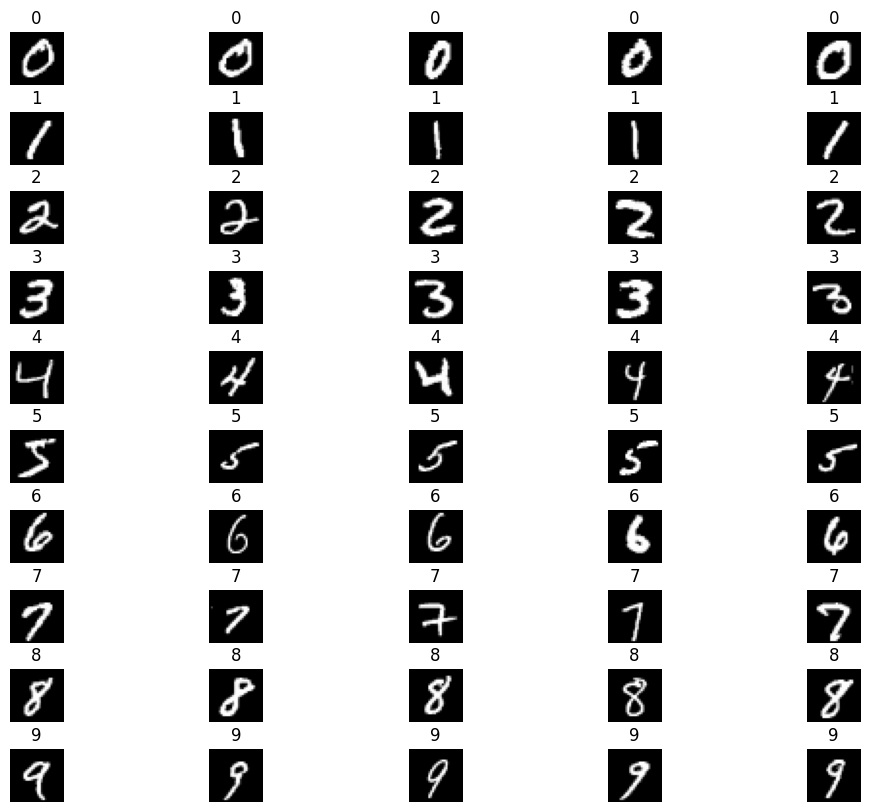

In [ ]:
# Create a dictionary to map class indices to class names
class_names = [str(i) for i in range(10)]

# Function to plot sample images from the dataset
def plot_sample_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(12, 10))
    for class_idx, class_name in enumerate(class_names):
        class_images = images[labels == class_idx]
        for i in range(num_images):
            plt.subplot(len(class_names), num_images, class_idx * num_images + i + 1)
            plt.imshow(class_images[i], cmap='gray')
            plt.title(class_name)
            plt.axis("off")
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

# Call the function to plot sample images from the training dataset
plot_sample_images(train_images, train_labels, class_names)

# Create and train pipelines for different models

In [ ]:
# Define the model architecture
num_classes = 10
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)




Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3304 - accuracy: 0.9051 - val_loss: 0.1537 - val_accuracy: 0.9559
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1620 - accuracy: 0.9520 - val_loss: 0.1251 - val_accuracy: 0.9638
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1185 - accuracy: 0.9649 - val_loss: 0.0978 - val_accuracy: 0.9715
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9703 - val_loss: 0.0892 - val_accuracy: 0.9739
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0806 - accuracy: 0.9748 - val_loss: 0.0850 - val_accuracy: 0.9729


# Visualize the results

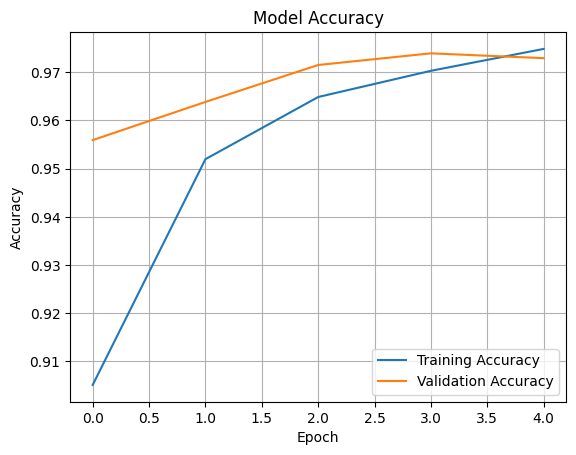

In [ ]:
# Plot the accuracy graph
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot the accuracy graph
plot_accuracy(history)

# valuate the model

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0807 - accuracy: 0.9740
Test Accuracy: 0.9739999771118164


# prediction

In [ ]:
import requests
from PIL import Image
from io import BytesIO


# Function to load and preprocess the image from the provided URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((28, 28))  # Resize the image to match the model's input shape (28x28)
    img = img.convert('L')  # Convert the image to grayscale
    img = np.array(img)
    img = img.reshape(1, 28, 28)  # Reshape the image to match the model's input shape
    img = img / 255.0  # Normalize the image
    return img

# Function to make predictions on the input image
def predict_digit(image_url):
    test_image = load_image_from_url(image_url)
    prediction = model.predict(test_image)[0]
    return {str(i): float(prediction[i]) for i in range(num_classes)}




In [ ]:
# Define Gradio Interface Components
image_url = gr.inputs.Textbox(label="Enter Image URL:")
label = gr.outputs.Label(num_top_classes=10)

# Create the Gradio Interface
interface = gr.Interface(fn=predict_digit, inputs=image_url, outputs=label, live=True, capture_session=True)

# Launch the Gradio Interface
interface.launch()

<ipython-input-25-0a1fde0fd9a5>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_url = gr.inputs.Textbox(label="Enter Image URL:")
<ipython-input-25-0a1fde0fd9a5>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_url = gr.inputs.Textbox(label="Enter Image URL:")
<ipython-input-25-0a1fde0fd9a5>:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  image_url = gr.inputs.Textbox(label="Enter Image URL:")
<ipython-input-25-0a1fde0fd9a5>:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=10)
<ipython-input-25-0a1fde0fd9a5>:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outp

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>